# Importing Liabraries

In [74]:
!pip install -U spacy

In [2]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Mohan Patil\AppData\Local\Temp\pip-install-w4q0_d5p\tensorflow-gpu_c4d414dc682a45bb8a1ce669e0bcaeb4\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu d

In [3]:
import tensorflow as tf

In [4]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Configure GPU memory growth
    for gpu in gpus:
        tf.config.experimental

In [75]:
## Importing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import spacy

## Methods And stopwords text preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

## Machine Learning Liabraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

import warnings
warnings.filterwarnings('ignore')

# English stopwords

In [4]:
## Creating a stopwords set
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Mohan
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Mohan
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mohan
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Mohan
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Load the Dataset

In [8]:
file =r"C:\Users\Mohan Patil\OneDrive\Desktop\Project Deployment_twitter\tweet.csv"
df = pd.read_csv(file,encoding='latin1')

# Dataset Detail

In [9]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [10]:
df.tail()

,tweets,class
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special â...,sarcasm
81407,@skeyno16 at u13?! I won't believe it until I ...,sarcasm


In [11]:
df.describe()

,tweets,class
count,81408,81408
unique,67997,4
top,$$$=&gt;&gt; #peace #love #freedom\n#fight for...,figurative
freq,14,21238


In [12]:
df.isnull().sum()

tweets    0
class     0
dtype: int64

In [13]:
df.shape

(81408, 2)

In [14]:
df['class'].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [16]:
df.duplicated().sum()

49

In [17]:
df= df.drop_duplicates(subset=['tweets'],keep='first')

In [18]:
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [19]:
df.shape

(67997, 2)

In [20]:
## Import Label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
## Encode label in column class
df['label']=label_encoder.fit_transform(df['class'])
df

,tweets,class,label
0,Be aware dirty step to get money #staylight ...,figurative,0
1,#sarcasm for #people who don't understand #diy...,figurative,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0
3,@wilw Why do I get the feeling you like games?...,figurative,0
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,3
81404,I never knew..I better put this out to the Uni...,sarcasm,3
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,3
81406,I'm sure coverage like the Fox News Special â...,sarcasm,3


In [21]:
# df['length']=df['tweets'].apply(len)
# df

# Preprocessing the Tweet Text
- Casing
- Noise Removal
- Tokenization
- Stopword Removal
- Text Normalization(Stemming and Lemmatization)

In [22]:
def preprocess_text(text):
  # Remove URLs
  text = re.sub(r"http\S+|www\S+|https\S+","",text,flags=re.MULTILINE)
  # Remove username and hashtags
  text = re.sub(r"\@\w+|\#","",text)
  # Remove Special Characters and numbers
  text = re.sub(r"[^\w\s]","",text)
  text = re.sub(r"\d+","",text)
  # Tokenize text
  tokens = word_tokenize(text)
  # convert to lower case
  tokens = [token.lower()for token in tokens]
  # Remove stopwords
  tokens = [token for token in tokens if token not in stop_words]
  # Stemming 
  ps = PorterStemmer()
  tokens = [ps.stem(token) for token in tokens]
  # Lemmatize tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token)for token in tokens]
  # join tokens back into text
  processed_text = " ".join(tokens)
  return processed_text

# Apply preprocessing to the tweets column
df['processed_text']=df['tweets'].apply(preprocess_text)
print(df[['tweets','processed_text']].head())

                                              tweets  \
0  Be aware  dirty step to get money  #staylight ...   
1  #sarcasm for #people who don't understand #diy...   
2  @IminworkJeremy @medsingle #DailyMail readers ...   
3  @wilw Why do I get the feeling you like games?...   
4  -@TeacherArthurG @rweingarten You probably jus...   

                                      processed_text  
0  awar dirti step get money staylight staywhit s...  
1        sarcasm peopl dont understand diy artattack  
2  dailymail reader sensibl alway shocker sarcast...  
3                         get feel like game sarcasm  
4                          probabl miss text sarcast  


In [23]:
## remove punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [25]:
df['processed_text']=df['processed_text'].apply(lambda x: remove_punctuations(x))
df.head()

,tweets,class,label,processed_text
0,Be aware dirty step to get money #staylight ...,figurative,0,awar dirti step get money staylight staywhit s...
1,#sarcasm for #people who don't understand #diy...,figurative,0,sarcasm peopl dont understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0,dailymail reader sensibl alway shocker sarcast...
3,@wilw Why do I get the feeling you like games?...,figurative,0,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0,probabl miss text sarcast


In [26]:
## Remove Frequent words
from collections import Counter
word_count = Counter()
for text in df['processed_text']:
  for word in text.split():
    word_count[word]+=1

word_count.most_common(50)

[('sarcasm', 24939),
 ('ironi', 17958),
 ('iron', 6210),
 ('news', 3356),
 ('get', 3297),
 ('love', 3264),
 ('peac', 3091),
 ('late', 2963),
 ('educ', 2920),
 ('like', 2909),
 ('drug', 2906),
 ('polit', 2882),
 ('humor', 2869),
 ('im', 2765),
 ('peopl', 2666),
 ('amp', 2654),
 ('day', 2495),
 ('ð', 2273),
 ('one', 2222),
 ('u', 2188),
 ('dont', 2147),
 ('go', 2098),
 ('funni', 2057),
 ('time', 1969),
 ('make', 1941),
 ('good', 1916),
 ('say', 1902),
 ('know', 1885),
 ('work', 1851),
 ('lol', 1850),
 ('gopdeb', 1701),
 ('see', 1596),
 ('great', 1540),
 ('want', 1513),
 ('sarcast', 1505),
 ('need', 1447),
 ('cant', 1443),
 ('today', 1439),
 ('new', 1434),
 ('right', 1420),
 ('thank', 1417),
 ('think', 1391),
 ('â', 1369),
 ('look', 1368),
 ('realli', 1365),
 ('would', 1332),
 ('life', 1305),
 ('oh', 1281),
 ('use', 1271),
 ('thing', 1220)]

In [27]:
## Remove Rare Words
rare_words = set(word for (word,wc) in word_count.most_common()[:-2000:-1])
rare_words

{'ijustwanttoeatbacon',
 'highfiv',
 'stillawak',
 'burqua',
 'cheesehead',
 'googlelogo',
 'farmingtonâ',
 'cabbagetown',
 'thesouth',
 'printerscann',
 'idolâ',
 'cashcow',
 'octgalapago',
 'agw',
 'lgay',
 'whysoseri',
 'thewho',
 'artistri',
 'newphonesystem',
 'fridayisnotmyfriend',
 'ialmostforgot',
 'visaul',
 'resound',
 'nightim',
 'unimpeach',
 'kr',
 'scrollingðð',
 'aretheyblind',
 'desivin',
 'notnot',
 'glaswegian',
 'jke',
 'spoiledpopul',
 'narnia',
 'buticanbesweetwheniwantto',
 'jlg',
 'poetryslam',
 'advntur',
 'peoplesn',
 'imsorri',
 'haveagreatday',
 'tabang',
 'ihateshot',
 'pasteryak',
 'ishouldhavegotanxboxon',
 'iamarobot',
 'pokingfun',
 'judicialactiv',
 'inayroldbodi',
 'gibvirl',
 'altieri',
 'hstore',
 'stuckinthecar',
 'approachbut',
 'golston',
 'harvestâ',
 'bluebellforal',
 'loveroadtrip',
 'manhat',
 'chineseown',
 'lawschoollif',
 'remotework',
 'thingsbetterthannikkisreign',
 'ppf',
 'provesaffornwrong',
 'pleasekillm',
 'murrayvskyrgio',
 'itweett

In [28]:
def remove_rare_words(text):
  return' '.join([word for word in text.split() if word not in rare_words])

In [29]:
df['processed_text']=df['processed_text'].apply(lambda x: remove_rare_words(x))
df.head()

,tweets,class,label,processed_text
0,Be aware dirty step to get money #staylight ...,figurative,0,awar dirti step get money staylight staywhit s...
1,#sarcasm for #people who don't understand #diy...,figurative,0,sarcasm peopl dont understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0,dailymail reader sensibl alway shocker sarcast...
3,@wilw Why do I get the feeling you like games?...,figurative,0,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0,probabl miss text sarcast


In [30]:
## Remove Special characters
def remove_spl_chars(text):
  text =re.sub(r'[^a-zA-Z0-9]',' ',text)
  text =re.sub('\s+',' ',text)
  return text

In [31]:
df['processed_text']=df['processed_text'].apply(lambda x: remove_spl_chars(x))
df.head()

,tweets,class,label,processed_text
0,Be aware dirty step to get money #staylight ...,figurative,0,awar dirti step get money staylight staywhit s...
1,#sarcasm for #people who don't understand #diy...,figurative,0,sarcasm peopl dont understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0,dailymail reader sensibl alway shocker sarcast...
3,@wilw Why do I get the feeling you like games?...,figurative,0,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0,probabl miss text sarcast


# EDA 

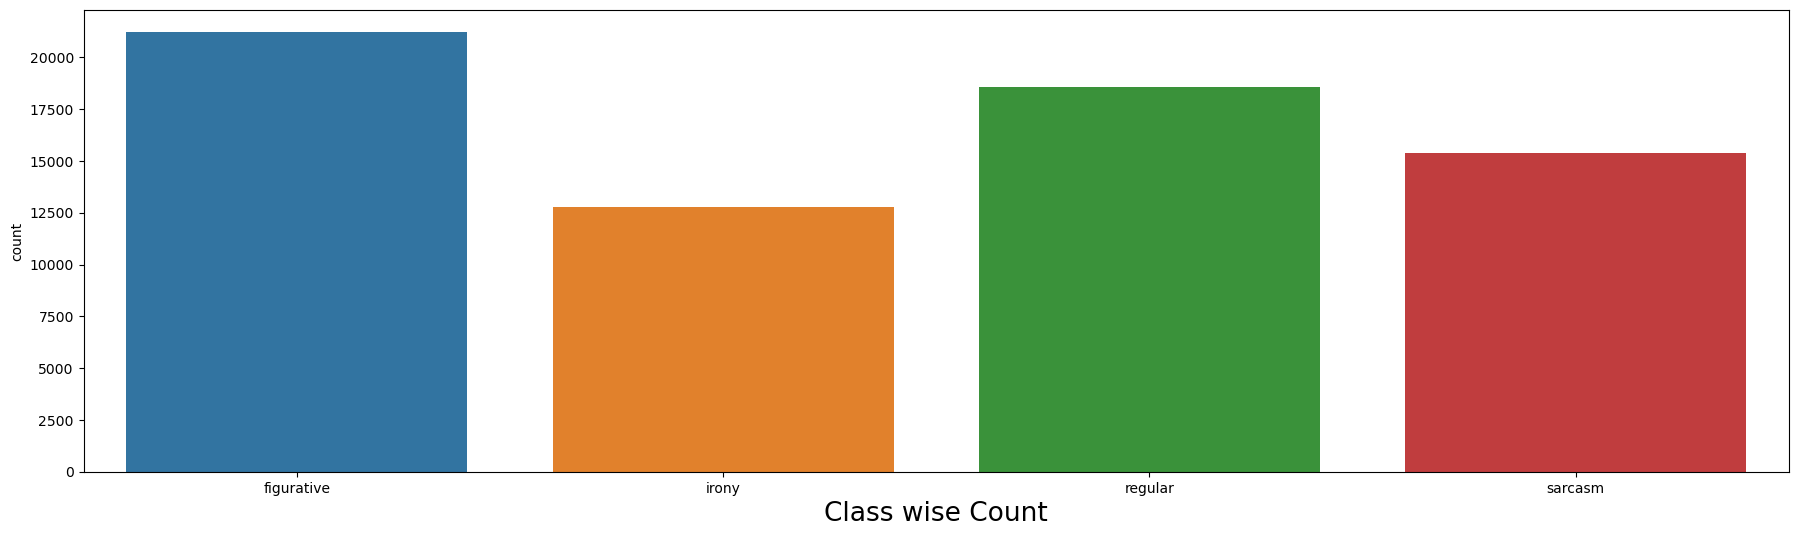

In [32]:
fig = plt.figure(figsize=(22,6))
sns.countplot(x='class',data=df)
plt.xlabel('Class wise Count',size=19)
plt.show()

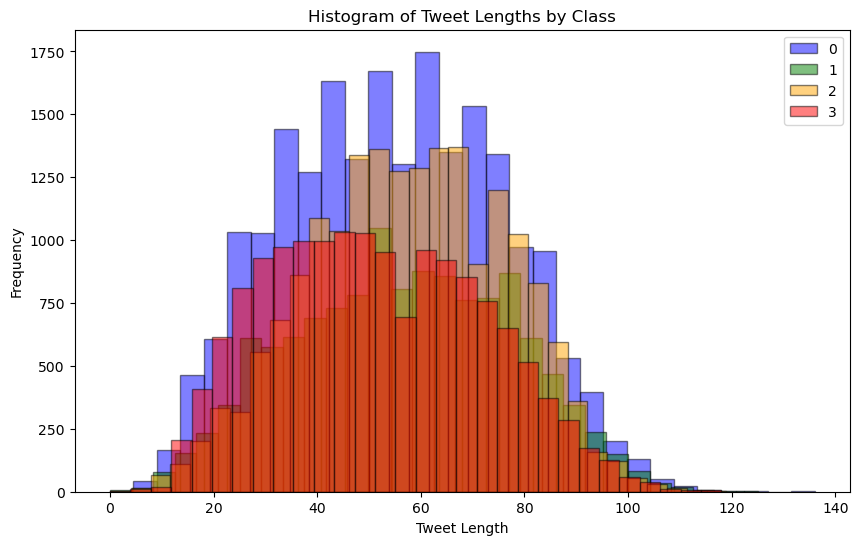

In [33]:
## Creating the histogram processed tweets and labels
tweets = df['processed_text'].values
labels = df['label'].values

## calculate the length of the tweets for each class
class_lengths = {}
for i,label in enumerate(labels):
    if label not in class_lengths:
        class_lengths[label]=[]
    class_lengths[label].append(len(tweets[i]))

## plot the histogram
plt.figure(figsize=(10,6))
colors= ['blue', 'green', 'orange', 'red']
labels = class_lengths.keys()
for i,label in enumerate(labels):
    plt.hist(class_lengths[label],bins=30,edgecolor='black',alpha=0.5, label=label, color=colors[i])

plt.title('Histogram of Tweet Lengths by Class')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()

Text(0.5, 1.0, 'Distribution of Classes')

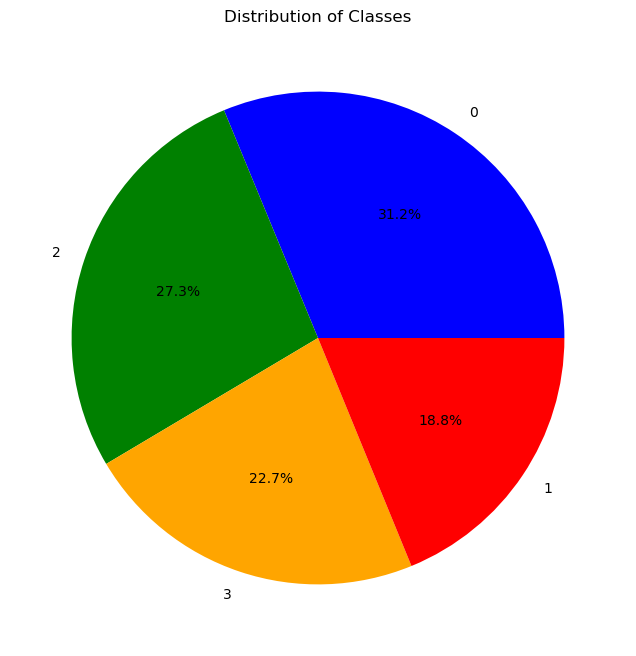

In [34]:
## Creating the pie chart
# Labels are already created in the above code
labels = df['label'].values
class_counts= pd.Series(labels).value_counts()

plt.figure(figsize=(8,8))
colors = ['blue', 'green', 'orange', 'red']
plt.pie(class_counts,labels=class_counts.index,colors=colors,autopct='%1.1f%%')
plt.title('Distribution of Classes')

In [35]:
df.head()


,tweets,class,label,processed_text
0,Be aware dirty step to get money #staylight ...,figurative,0,awar dirti step get money staylight staywhit s...
1,#sarcasm for #people who don't understand #diy...,figurative,0,sarcasm peopl dont understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0,dailymail reader sensibl alway shocker sarcast...
3,@wilw Why do I get the feeling you like games?...,figurative,0,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0,probabl miss text sarcast


In [36]:
figurative_ = df[df['label']==0]
irony = df[df['label']==1]
regular = df[df['label']==2]
sarcasm = df[df['label']==3]

### Wordcloud 

In [37]:
from wordcloud import WordCloud
def wordcld(data,title):
  txt = " ".join(data['processed_text'])
  txt = txt.lower()
  stop = stop_words

  wc = WordCloud(background_color='black',max_words=50,colormap='Set1',stopwords=stop).generate(txt)
  plt.imshow(wc)
  plt.axis('off')
  plt.title(title)

In [38]:
# Separating Figurative classified data
figurative = ' '.join(figurative_['processed_text'].fillna('').astype(str))

In [39]:
figurative

'awar dirti step get money staylight staywhit sarcast moralneed sarcasm peopl dont understand diy artattack dailymail reader sensibl alway shocker sarcast dailyfail inhuntspocket theyhatethenh get feel like game sarcasm probabl miss text sarcast tune nigezi treat rachel platten fight song move mtv get reminisc amp olamid local rapper ironi timeschang iz thiz friggin dc love fest sarcasm moviefight man wish could sexual harass intox minor go jail sarcasm car ride get listen jess whole time yeah woo cant wait either sarcasm aamir call bajrangibhaijaan salman best movi yet decid whether sarcasm compliment sorri cant understand dark sen humor sarcasm work yay sarcasm fuck goodnight g town come onit metsthat like loss doubl team best sarcasm thought hot spot polic plan btw realli work sarcasm dont daft dr ciara measl doesnt kill old fashion diseas like scurvi trench foot sarcasm dont think tv show could epic mastershowman show bee knee sarcast go anoth day paradis sarcasm sure sarcasm job g

In [40]:
words = word_tokenize(figurative)
df1 = pd.DataFrame(words,columns=['words'])

In [41]:
df1.head()

,words
0,awar
1,dirti
2,step
3,get
4,money


In [42]:
freq_figurative= pd.Series(' '.join(df1['words']).split()).value_counts()
freq_figurative

sarcasm          10214
ironi             7975
iron              2950
get               1227
im                1061
                 ...  
secondlanguag        1
knowslisten          1
neymar               1
imperialist          1
quinlan              1
Length: 24204, dtype: int64

In [43]:
freq_figurative_top_100 = freq_figurative[0:100]
freq_figurative_top_100

sarcasm    10214
ironi       7975
iron        2950
get         1227
im          1061
           ...  
follow       222
help         219
he           218
thought      216
keep         214
Length: 100, dtype: int64

In [44]:
df_figurative = freq_figurative.reset_index()
df_figurative.columns = ['figurative_words','figurative_counts']
df_figurative

,figurative_words,figurative_counts
0,sarcasm,10214
1,ironi,7975
2,iron,2950
3,get,1227
4,im,1061
...,...,...
24199,secondlanguag,1
24200,knowslisten,1
24201,neymar,1
24202,imperialist,1


In [45]:
# Separating Irony classified data
irony_ = ' '.join(irony['processed_text'].fillna('').astype(str))
words_irony = word_tokenize(irony_)
df2 = pd.DataFrame(words_irony,columns=['words'])
freq_irony = pd.Series(' '.join(df2['words']).split()).value_counts()
df_irony = freq_irony.reset_index()
df_irony.columns=['irony_words','irony_counts']
df_irony

,irony_words,irony_counts
0,ironi,9972
1,iron,3249
2,peopl,705
3,get,663
4,amp,626
...,...,...
18326,shorter,1
18327,rigid,1
18328,ravishastri,1
18329,listicl,1


In [46]:
# Separating Regular classified data
regular_ = ' '.join(regular['processed_text'].fillna('').astype(str))
words_regular = word_tokenize(regular_)
df3 = pd.DataFrame(words_regular,columns=['words'])
freq_regular = pd.Series(' '.join(df3['words']).split()).value_counts()
df_regular = freq_regular.reset_index()
df_regular.columns=['regular_words','regular_counts']
df_regular

,regular_words,regular_counts
0,peac,2988
1,news,2936
2,educ,2810
3,drug,2808
4,late,2777
...,...,...
23488,ltd,1
23489,dsf,1
23490,noemi,1
23491,rodriguez,1


In [47]:
# Separating sarcasm classified data
sarcasm_ = ' '.join(sarcasm['processed_text'].fillna('').astype(str))
words_sarcasm = word_tokenize(sarcasm_)
df4 = pd.DataFrame(words_sarcasm,columns=['words'])
freq_sarcasm = pd.Series(' '.join(df4['words']).split()).value_counts()
df_sarcasm = freq_sarcasm.reset_index()
df_sarcasm.columns=['sarcasm_words','sarcasm_counts']
df_sarcasm

,sarcasm_words,sarcasm_counts
0,sarcasm,14743
1,love,1023
2,sarcast,923
3,im,901
4,get,880
...,...,...
16260,nyquil,1
16261,fuckmonday,1
16262,philadelphia,1
16263,itwassupposedtobearomanticnight,1


In [48]:
merged_df = pd.merge(df_figurative, df_irony, left_on='figurative_words', right_on='irony_words', how='outer')
merged_df = pd.merge(merged_df, df_regular, left_on='figurative_words', right_on='regular_words', how='outer')
merged_df = pd.merge(merged_df, df_sarcasm, left_on='figurative_words', right_on='sarcasm_words', how='outer')

In [49]:
merged_df

,figurative_words,figurative_counts,irony_words,irony_counts,regular_words,regular_counts,sarcasm_words,sarcasm_counts
0,sarcasm,10214.0,sarcasm,7.0,NaN,NaN,sarcasm,14743.0
1,ironi,7975.0,ironi,9972.0,ironi,6.0,ironi,6.0
2,iron,2950.0,iron,3249.0,iron,4.0,iron,10.0
3,get,1227.0,get,663.0,get,529.0,get,880.0
4,im,1061.0,im,503.0,im,302.0,im,901.0
...,...,...,...,...,...,...,...,...
55106,NaN,NaN,NaN,NaN,NaN,NaN,comedienn,1.0
55107,NaN,NaN,NaN,NaN,NaN,NaN,cbp,1.0
55108,NaN,NaN,NaN,NaN,NaN,NaN,fuckmonday,1.0
55109,NaN,NaN,NaN,NaN,NaN,NaN,itwassupposedtobearomanticnight,1.0


In [50]:
# merged_df.to_csv(r'C:\Users\Mohan Patil\OneDrive\Desktop\Project_twitter\merged_df.csv')

In [51]:
merged_df_copy = merged_df.copy()

In [52]:
merged_df_copy['word'] = pd.concat([merged_df_copy['figurative_words'],merged_df_copy['irony_words'],merged_df_copy['regular_words'],
                                    merged_df_copy['sarcasm_words']],ignore_index=True)
# Droping the column of words
merged_df_copy.drop(columns=['figurative_words', 'irony_words', 'regular_words', 'sarcasm_words'], inplace=True)
merged_df_1=merged_df_copy.copy()
merged_df_1

,figurative_counts,irony_counts,regular_counts,sarcasm_counts,word
0,10214.0,7.0,NaN,14743.0,sarcasm
1,7975.0,9972.0,6.0,6.0,ironi
2,2950.0,3249.0,4.0,10.0,iron
3,1227.0,663.0,529.0,880.0,get
4,1061.0,503.0,302.0,901.0,im
...,...,...,...,...,...
55106,NaN,NaN,NaN,1.0,NaN
55107,NaN,NaN,NaN,1.0,NaN
55108,NaN,NaN,NaN,1.0,NaN
55109,NaN,NaN,NaN,1.0,NaN


In [53]:
# merged_df_1.to_csv(r'C:\Users\Mohan Patil\OneDrive\Desktop\Project_twitter\merged_df_1.csv')

In [54]:
top_100_regular=df_regular.iloc[0:100, :]
top_100_figurative=df_figurative.iloc[0:100, : ]
top_100_irony=df_irony.iloc[0:100, : ]
top_100_sarcasm=df_sarcasm.iloc[0:100, : ]

In [55]:
top_100_regular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   regular_words   100 non-null    object
 1   regular_counts  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [56]:
merged_df_100 = pd.merge(top_100_figurative, top_100_irony, left_on='figurative_words', right_on='irony_words', how='outer')
merged_df_100 = pd.merge(merged_df_100, top_100_regular, left_on='figurative_words', right_on='regular_words', how='outer')
merged_df_100 = pd.merge(merged_df_100, top_100_sarcasm, left_on='figurative_words', right_on='sarcasm_words', how='outer')

In [57]:
merged_df_100

,figurative_words,figurative_counts,irony_words,irony_counts,regular_words,regular_counts,sarcasm_words,sarcasm_counts
0,sarcasm,10214.0,NaN,NaN,NaN,NaN,sarcasm,14743.0
1,ironi,7975.0,ironi,9972.0,NaN,NaN,NaN,NaN
2,iron,2950.0,iron,3249.0,NaN,NaN,NaN,NaN
3,get,1227.0,get,663.0,get,529.0,get,880.0
4,im,1061.0,im,503.0,im,302.0,im,901.0
...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,NaN,shock,167.0
178,NaN,NaN,NaN,NaN,NaN,NaN,total,166.0
179,NaN,NaN,NaN,NaN,NaN,NaN,week,164.0
180,NaN,NaN,NaN,NaN,NaN,NaN,someth,163.0


In [58]:
# Specify columns and their respective fill values
fill_NAN_Values = {'figurative_words': '-', 'figurative_count': 0, 'irony_words': '-', 'irony_count' : 0, 'regular_words': '-', 
               'regular_count': 0, 'sarcasm_words': '-', 'sarcasm_count':0 }

# Fill specific columns with the specified fill values
df_fill_100 = merged_df_100.fillna(value=fill_NAN_Values)

In [59]:
df_fill_100

,figurative_words,figurative_counts,irony_words,irony_counts,regular_words,regular_counts,sarcasm_words,sarcasm_counts
0,sarcasm,10214.0,-,NaN,-,NaN,sarcasm,14743.0
1,ironi,7975.0,ironi,9972.0,-,NaN,-,NaN
2,iron,2950.0,iron,3249.0,-,NaN,-,NaN
3,get,1227.0,get,663.0,get,529.0,get,880.0
4,im,1061.0,im,503.0,im,302.0,im,901.0
...,...,...,...,...,...,...,...,...
177,-,NaN,-,NaN,-,NaN,shock,167.0
178,-,NaN,-,NaN,-,NaN,total,166.0
179,-,NaN,-,NaN,-,NaN,week,164.0
180,-,NaN,-,NaN,-,NaN,someth,163.0


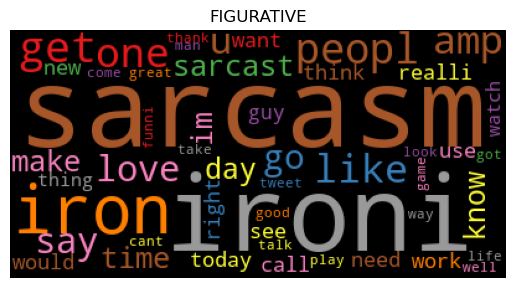

In [60]:
wordcld(figurative_,'FIGURATIVE')

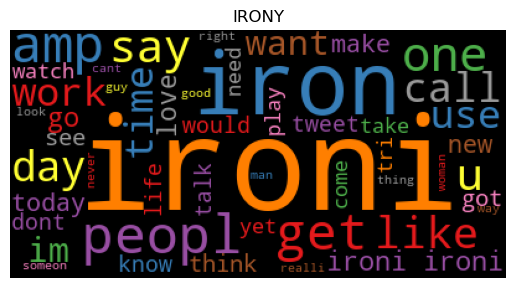

In [61]:
wordcld(irony,'IRONY')

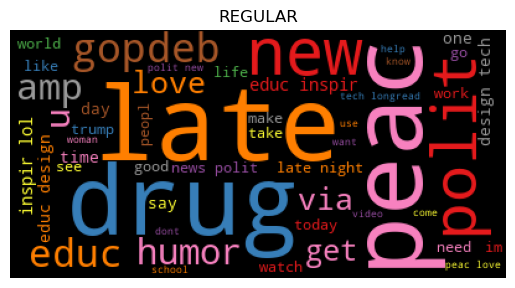

In [62]:
wordcld(regular,'REGULAR')

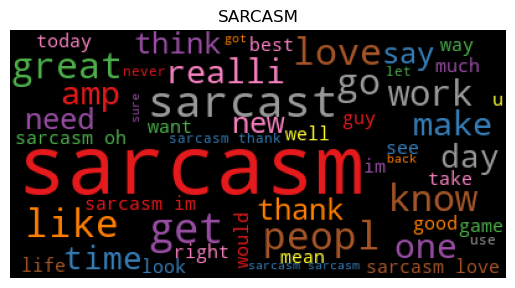

In [63]:
wordcld(sarcasm,'SARCASM')

In [64]:
df['processed_text']

0        awar dirti step get money staylight staywhit s...
1              sarcasm peopl dont understand diy artattack
2        dailymail reader sensibl alway shocker sarcast...
3                               get feel like game sarcasm
4                                probabl miss text sarcast
                               ...                        
81403    photo imag via heart childhood cool funni sarcasm
81404    never better put univers there date upon horiz...
81405    hey want say thank puberti let apart itti bitt...
81406    im sure coverag like fox news special the hidd...
81407                          u wont believ see p sarcasm
Name: processed_text, Length: 67997, dtype: object

In [65]:
df['processed_text'].shape

(67997,)

# Emotion mining and Sentiment Analysis

In [68]:
# Emotion Lexicon - Affin
affin=pd.read_csv(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\Afinn.csv",encoding='latin1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [69]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [84]:
# userdefine function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None,word_limit:int= None):
    sent_score = 0
    if text:
        sentence=nlp(text)
        word_count = 0
        for word in sentence:
            if word_limit and word_count >= word_limit:
                break
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
            word_count += 1
    return sent_score

In [85]:
df['sentiment_value']=df['processed_text'].apply(lambda x: calculate_sentiment(x,word_limit=100))
df['sentiment_value']

0        0
1        0
2        0
3        2
4       -2
        ..
81403    1
81404    5
81405   -1
81406    2
81407    0
Name: sentiment_value, Length: 67997, dtype: int64

In [87]:
# how many words are there in a sentence?
df['word_count']=df['processed_text'].str.split().apply(len)
df['word_count']

0         9
1         6
2         9
3         5
4         4
         ..
81403     8
81404    11
81405    14
81406    13
81407     6
Name: word_count, Length: 67997, dtype: int64

In [91]:
df.sort_values('sentiment_value',ascending=False)

,tweets,class,label,processed_text,sentiment_value,word_count
46740,Agreed #funny #lmao #lmfao #ladies #lol #fun ...,regular,2,agre funni lmao lmfao ladi lol fun joke joke j...,26,14
46857,Pretty much! #funny #lmao #lmfao #ladies #lol...,regular,2,pretti much funni lmao lmfao ladi lol fun joke...,26,15
45525,I forgot to post this yesterday #funny #lmao ...,regular,2,forgot post yesterday funni lmao lmfao ladi lo...,23,13
46787,The reality if this twat #funny #lmao #lmfao #...,regular,2,realiti twat funni lmao lmfao ladi lol fun jok...,21,13
44173,Still the best Venn diagram via /r/funny http:...,regular,2,still best venn diagram via rfunni funni lol h...,19,13
...,...,...,...,...,...,...
33073,Founder of website that relies on liars &amp; ...,irony,1,founder websit reli liar amp cheat resign fall...,-16,14
79379,"@billburr Not trying to be cunt, but where the...",sarcasm,3,tri cunt fuck mm podcast even give fuck gfi fr...,-17,12
35742,@NicoleArbour \nYou screwed up ... own it\nCun...,irony,1,screw cunt bitch whore die kill help make bett...,-18,11
36348,"""When you don't know what irony is"" RT @Nicole...",irony,1,dont know ironi rt realli mean u said cunt bit...,-20,14


In [92]:
# Sentiment score of the whole review
df['sentiment_value'].describe()

count    67997.000000
mean         0.565951
std          2.427008
min        -20.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         26.000000
Name: sentiment_value, dtype: float64

In [93]:
# negative sentiment score of the whole review
df[df['sentiment_value']<=0]

,tweets,class,label,processed_text,sentiment_value,word_count
0,Be aware dirty step to get money #staylight ...,figurative,0,awar dirti step get money staylight staywhit s...,0,9
1,#sarcasm for #people who don't understand #diy...,figurative,0,sarcasm peopl dont understand diy artattack,0,6
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0,dailymail reader sensibl alway shocker sarcast...,0,9
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0,probabl miss text sarcast,-2,4
5,Tune in to Nigezie and be treated to Rachel Pl...,figurative,0,tune nigezi treat rachel platten fight song mo...,-1,17
...,...,...,...,...,...,...
81397,Class in the morning ð. Yippee #sarcasm,sarcasm,3,class morn yippe sarcasm,0,4
81398,Whoa. Didn't see that coming. #sarcasm,sarcasm,3,whoa didnt see come sarcasm,0,5
81401,Looks like aj brown is having a bad game... He...,sarcasm,3,look like aj brown bad game must overr smh sar...,-1,10
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,3,hey want say thank puberti let apart itti bitt...,-1,14


In [94]:
# positive sentiment score of the whole review
df[df['sentiment_value']>0]

,tweets,class,label,processed_text,sentiment_value,word_count
3,@wilw Why do I get the feeling you like games?...,figurative,0,get feel like game sarcasm,2,5
6,What iz thiz?!?!? A friggin DC love fest??!?!?...,figurative,0,iz thiz friggin dc love fest sarcasm moviefight,3,8
7,"man, i wish i could sexually harass an intoxic...",figurative,0,man wish could sexual harass intox minor go ja...,1,10
8,@raaachf for the car ride when I get to listen...,figurative,0,car ride get listen jess whole time yeah woo c...,4,13
9,Aamir calls #BajrangiBhaijaan as Salman's best...,figurative,0,aamir call bajrangibhaijaan salman best movi y...,3,11
...,...,...,...,...,...,...
81400,Nothing like having someone to talk to about y...,sarcasm,3,noth like someon talk wonder day sarcasm,2,7
81402,oh I love 4 hour bus rides #sarcasm,sarcasm,3,oh love hour bu ride sarcasm,3,6
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,3,photo imag via heart childhood cool funni sarcasm,1,8
81404,I never knew..I better put this out to the Uni...,sarcasm,3,never better put univers there date upon horiz...,5,11


In [96]:
# Adding index cloumn
df['index']=range(0,len(df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

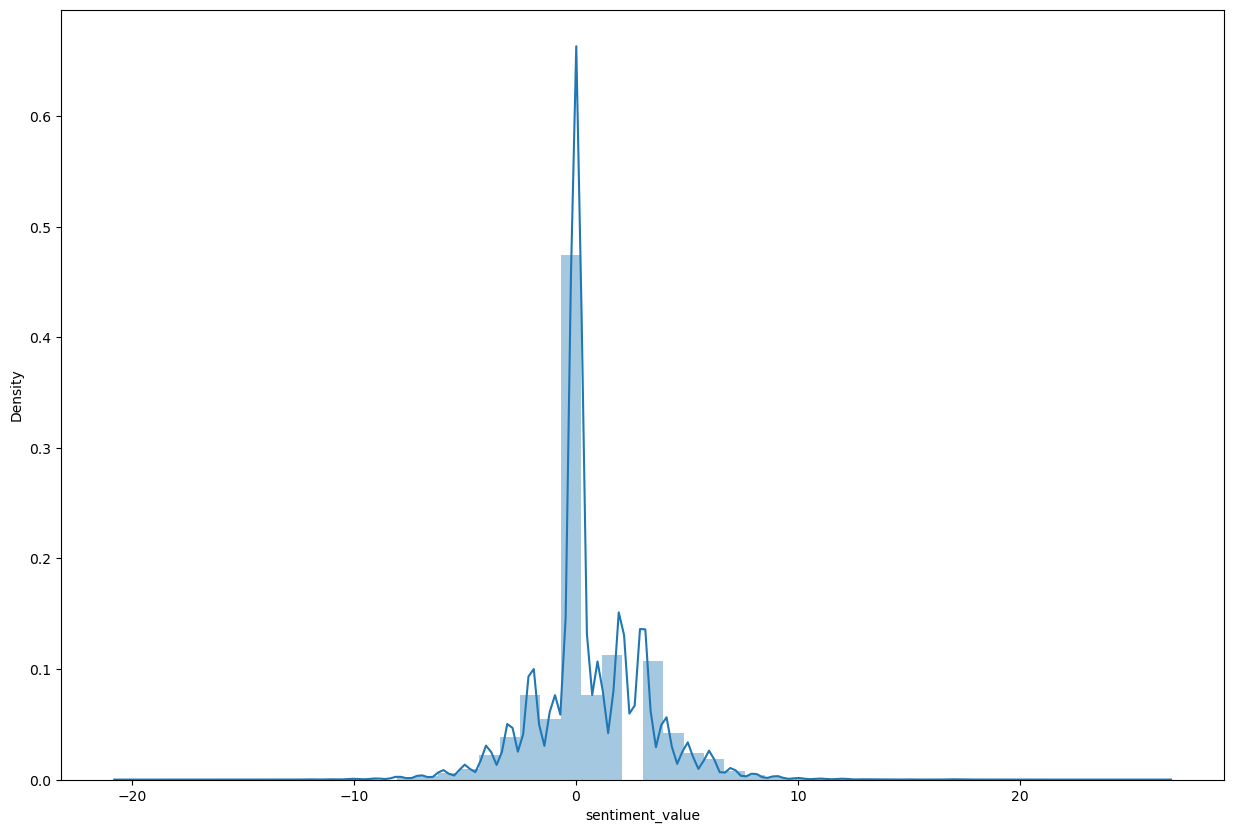

In [95]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

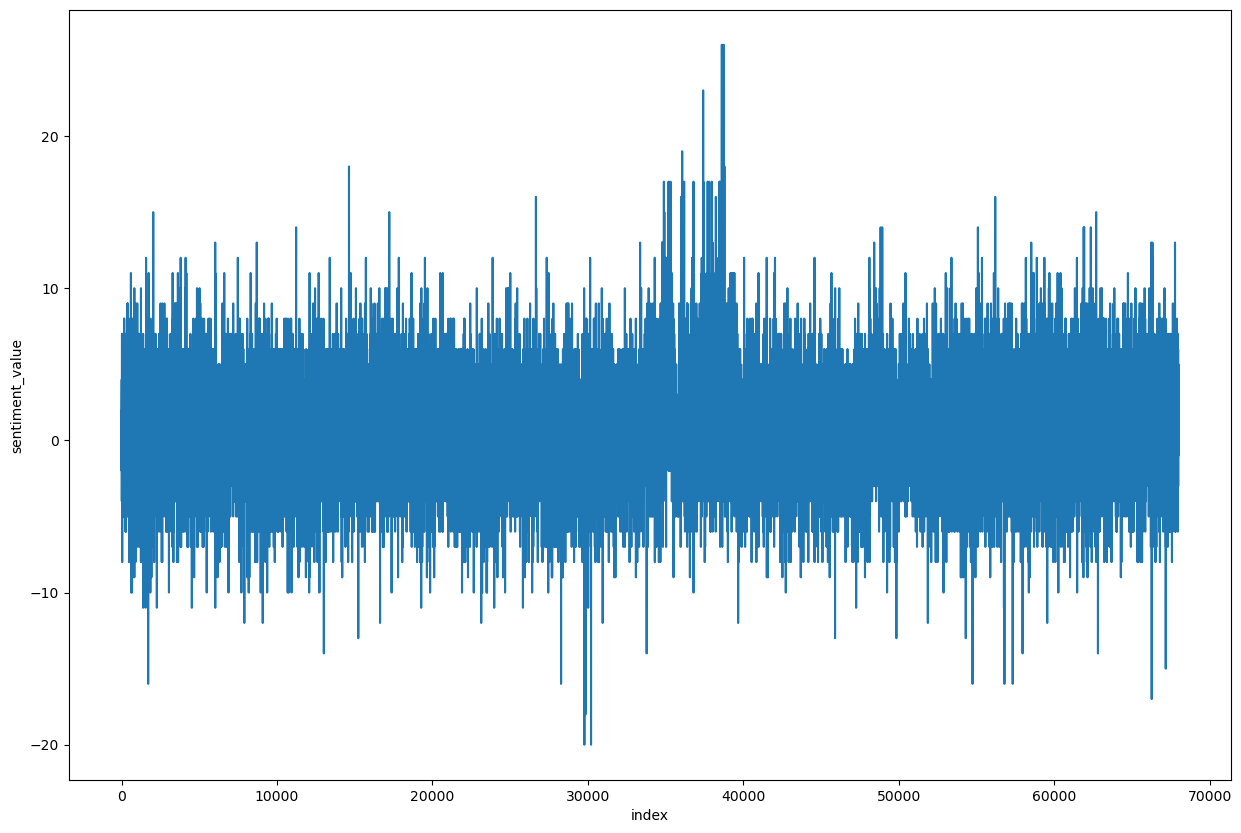

In [97]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=df)

In [67]:
## import ngram and convert the label to list 
from nltk.util import ngrams 
from nltk.tokenize import word_tokenize

text_list = df['processed_text'].tolist()
label_list = df['label'].tolist()

# Word-Embeding Using Word2Vec

In [90]:
from gensim.models import Word2Vec

# Tokenize the text
tokenized_text = [text.split() for text in text_list]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text,vector_size=500,window=5,min_count=1,workers=4)

# Function to generate the document vector by averaging word vectors
def document_vector(model, doc):
    doc_vector = np.zeros(model.vector_size)
    count = 0
    for word in doc:
        if word in model.wv:
            doc_vector += model.wv[word]
            count += 1
    if count != 0:
        doc_vector /= count
    return doc_vector

# Generate document vector for each tweet
text_vectors= [document_vector(model,text)for text in tokenized_text]

# Convert text_vector to numpy array
X = np.array(text_vectors)

# Assuming 'labels' is a list containing the corresponding labels for each tweet
y = np.array(label_list)

## Spliting the data into training testing set
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)


## Training and Evaluating the Logistic Regression model

In [97]:
from sklearn.model_selection import GridSearchCV

## Creating the instance of Logistic Regression model
log_reg = LogisticRegression(C=30.0,solver='newton-cg',multi_class='multinomial',random_state=42)

## Train the model 
log_reg.fit(X_train_lr,y_train_lr)

## predict the label for test set
y_pred_lr = log_reg.predict(X_test_lr)

## Evaluate the model 
accuracy = accuracy_score(y_test_lr,y_pred_lr)
print(classification_report(y_test_lr,y_pred_lr))
print('Accuracy :',accuracy)

              precision    recall  f1-score   support

           0       0.46      0.20      0.28      4199
           1       0.55      0.76      0.64      2556
           2       1.00      1.00      1.00      3741
           3       0.61      0.88      0.72      3104

    accuracy                           0.68     13600
   macro avg       0.65      0.71      0.66     13600
weighted avg       0.66      0.68      0.64     13600

Accuracy : 0.6803676470588236


In [1]:
import pickle

In [ ]:
pickle.dump(log_reg,open('log_reg.pkl','wb'))